In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

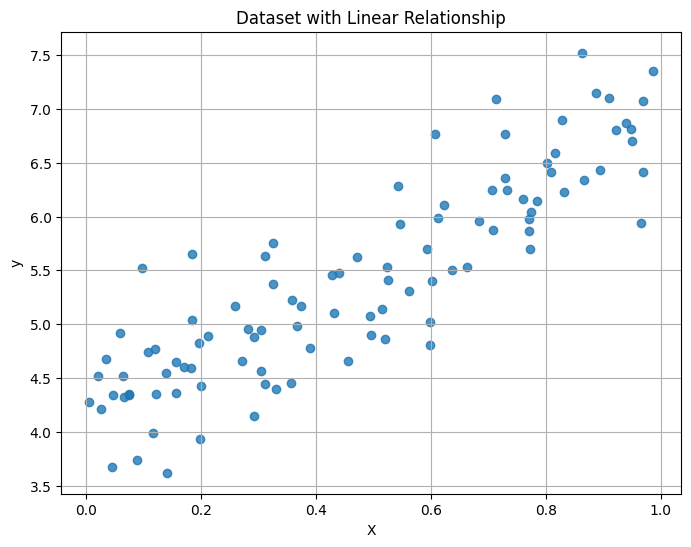

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random x
x = np.random.rand(100, 1)

# Generate y = 3x + 4 + noise
y = 4 + 3 * x + np.random.randn(100, 1)/2

# Plot the dataset
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8)
plt.title('Dataset with Linear Relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()


Y = 2.8 * X + 4.1
Mean Squared Error: 0.20
R^2 Score: 0.77


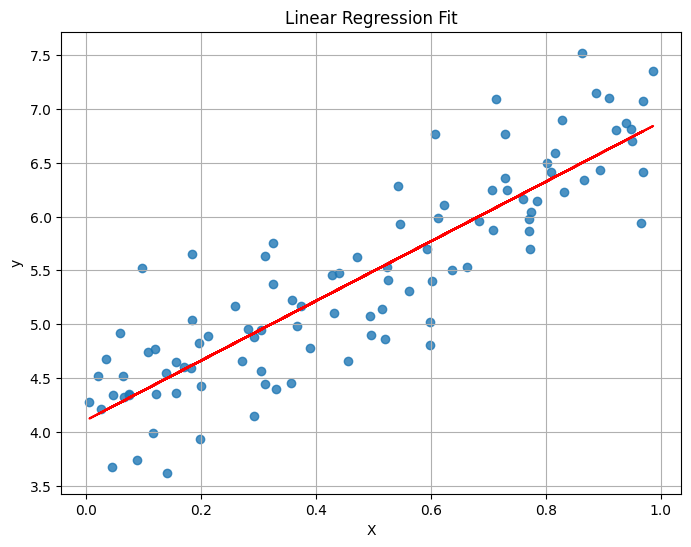

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Predict y values
y_pred = model.predict(x)

# Calculate the coefficients
print(f"Y = {model.coef_[0][0]:2.1f} * X + {model.intercept_[0]:2.1f}")

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:2.2f}")
print(f"R^2 Score: {r2:2.2f}")

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8, label='Data')
plt.plot(x, y_pred, color='red', label='Linear fit')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

Mean Squared Error (Quadratic): 7.211783369649673
R^2 Score (Quadratic): 0.9120291743277256


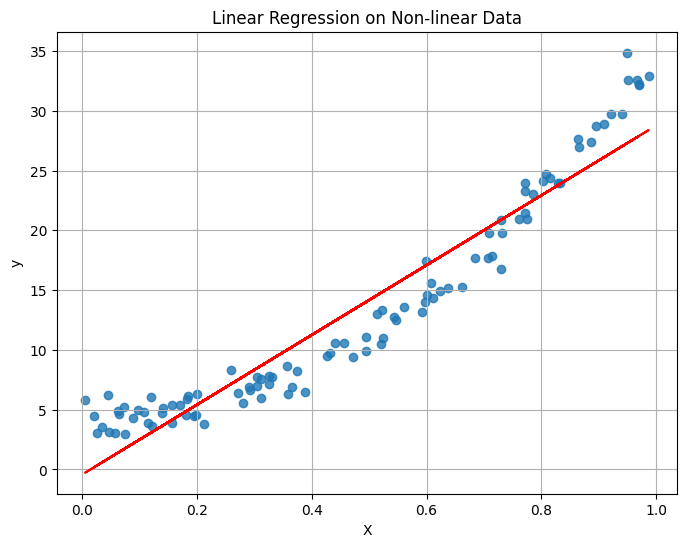

In [ ]:
# Generate y as a quadratic function of x
y_quadratic = 4 + 30 * x**2 + np.random.randn(100, 1)

# Fit the model to the quadratic data
model.fit(x, y_quadratic)
y_quad_pred = model.predict(x)

# Evaluate the model on the quadratic data
mse_quad = mean_squared_error(y_quadratic, y_quad_pred)
r2_quad = r2_score(y_quadratic, y_quad_pred)
print(f"Mean Squared Error (Quadratic): {mse_quad}")
print(f"R^2 Score (Quadratic): {r2_quad}")

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(x, y_quadratic, alpha=0.8, label='Quadratic data')
plt.plot(x, y_quad_pred, color='red', label='Linear fit')
plt.title('Linear Regression on Non-linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [ ]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate random x1 and x2
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)

# Combine x1 and x2 into a single feature matrix
X = np.hstack((x1, x2))

# Generate y = 3x1 + 2x2 + 4 + noise
y = 4 + 3 * x1 + 2 * x2 + np.random.randn(100, 1)/5

In [ ]:
# Create a linear regression model
model_multi = LinearRegression()

# Fit the model to the data
model_multi.fit(X, y)

# Predict y values
y_multi_pred = model_multi.predict(X)

# Display the coefficients
print(f"Coefficients: {model_multi.coef_[0]}")
print(f"Intercept: {model_multi.intercept_[0]}")

# Evaluate the model
mse_multi = mean_squared_error(y, y_multi_pred)
r2_multi = r2_score(y, y_multi_pred)
print(f"Mean Squared Error (Multi-variable): {mse_multi:2.2f}")
print(f"R^2 Score (Multi-variable): {r2_multi:2.2f}")


Coefficients: [2.88967089 1.94823065]
Intercept: 4.061461061359431
Mean Squared Error (Multi-variable): 0.03
R^2 Score (Multi-variable): 0.97


In [ ]:
import sklearn.datasets

# Load the diabetes dataset.
df = sklearn.datasets.load_diabetes(as_frame=True)['frame']
# Find a 1d linear regression  for each of the columns - age,bmi,s1,s2,s3,s4,s5,s6 to predict target
#  Write a function to avoid code duplication
def linear_regression(df,feature_name,target_name='target'):
    y = df['target'].values.reshape(-1,1)
    x = df[feature_name].values.reshape(-1,1)
    model = LinearRegression()
    # Fit the model to the data
    model.fit(x, y)

    y_pred = model.predict(x)
    r2_score_val = r2_score(y, y_pred)
    return model,r2_score_val

for feature_name in ['age','bmi','s1','s2','s3','s4','s5','s6']:
   model,r2_score_val = linear_regression(df,feature_name)
   print(feature_name,r2_score_val)

# Suppose that you need to predict target and you can use only one feature.
# If you could use only one feature from the ones mentioned above, which one would you choose?

#  ----  BMI has the highest R2 score, so we should choose it. s5 is also close enough.



age 0.03530218264671636
bmi 0.3439237602253802
s1 0.04495353245556555
s2 0.030294651136685613
s3 0.15585855244530533
s4 0.18528968598509687
s5 0.32022310842972057
s6 0.1462936157229343


In [ ]:
# Advanced - write a function that does feature selection. It gets as input the names of the possible features, and selects the best one.
#   It selectes only one.

def feature_selection(feature_names):
  best_feature_name = None
  best_r2_score_val = 0
  for feature_name in feature_names:
    model,r2_score_val = linear_regression(df,feature_name)
    if r2_score_val > best_r2_score_val:
      best_r2_score_val = r2_score_val
      best_feature_name = feature_name
  return best_feature_name


feature_names = ['age','bmi','s1','s2','s3','s4','s5','s6']
feature_selection(feature_names)

'bmi'